In [1]:
import numpy as np
import matplotlib.pyplot as plt
import dionysus as dio
from Laplacian_Functions_torch import *
# from landscapes imp?ort Landscape

import gudhi


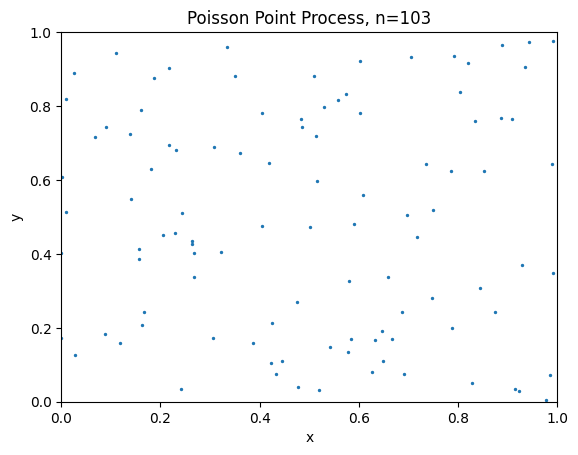

(array([1.87161287e-01, 6.03053016e-01, 4.33893833e-01, 1.66441553e-01,
        6.47179706e-01, 1.57406132e-01, 6.91916704e-01, 3.06234284e-01,
        2.67596675e-01, 1.56980817e-01, 5.10061306e-01, 6.08548362e-01,
        9.09231366e-01, 5.80488889e-01, 8.88681754e-02, 5.57600483e-01,
        5.78767188e-01, 3.49253726e-01, 6.02316213e-01, 9.90472267e-01,
        6.26862802e-01, 9.35180357e-01, 4.85940078e-01, 1.29776962e-04,
        2.63452379e-01, 2.31508045e-01, 7.04312094e-01, 6.86422765e-01,
        1.81439454e-01, 5.42412651e-01, 4.04620077e-01, 2.42231222e-01,
        4.19023940e-01, 6.48591437e-01, 5.02463202e-01, 1.62251801e-01,
        2.67248849e-01, 1.38801113e-01, 8.35049471e-01, 4.44719003e-01,
        7.35900731e-01, 8.43816983e-01, 1.18872930e-01, 3.86752581e-01,
        8.27317143e-01, 2.63869201e-01, 5.12669081e-01, 3.69652289e-05,
        5.83256885e-01, 8.51342387e-01, 1.40883785e-01, 8.87483708e-01,
        9.89672907e-01, 1.00397818e-02, 8.02899860e-01, 4.753047

In [2]:
def poissonPointProcess(intensity, xMin=0, xMax=1, yMin=0, yMax=1, plot=False, seed=None):
    xDelta=xMax-xMin;yDelta=yMax-yMin #rectangle dimensions
    areaTotal=xDelta*yDelta
    if seed is not None:
        np.random.seed(seed) #set the random seed for reproducibility

    #Simulate a Poisson point process
    numbPoints = np.random.poisson(intensity*areaTotal);#Poisson number of points
    xx = xDelta*np.random.uniform(0,1,numbPoints)+xMin;#x coordinates of Poisson points
    yy = yDelta*np.random.uniform(0,1,numbPoints)+yMin;#y coordinates of Poisson points

    #Plot the points
    if plot:
        plt.figure()
        plt.scatter(xx,yy,s=2)
        plt.xlim(xMin,xMax)
        plt.ylim(yMin,yMax)
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title(f'Poisson Point Process, n={numbPoints}')
        plt.show()
    return xx,yy

poissonPointProcess(100, plot=True)

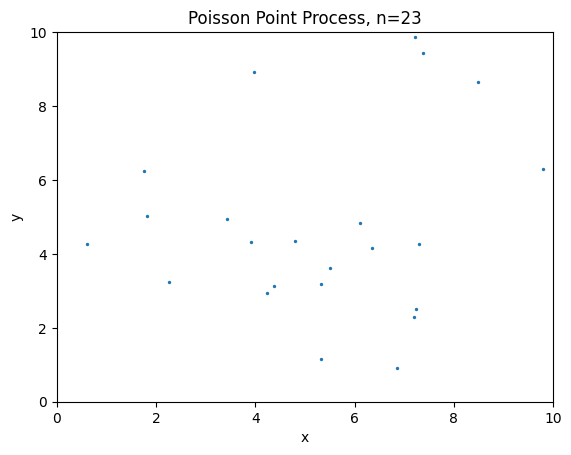

Filtration with 87 simplices


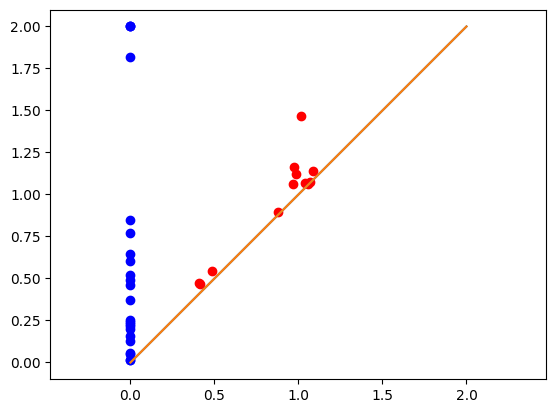

In [3]:
import gudhi.alpha_complex


xx, yy = poissonPointProcess(0.2, xMax=10, yMax = 10, seed=123, plot=True)
max_r = 2
# f = dio.fill_rips(np.array([xx, yy]).T, 1, max_r)
f = dio.Filtration()
tree = gudhi.alpha_complex.AlphaComplex(points=np.array([xx, yy]).T).create_simplex_tree(max_alpha_square=max_r)
for vertices, t in tree.get_filtration():
     f.append(dio.Simplex(vertices, t))
print(f)
f.sort()
p = dio.cohomology_persistence(f, 47, True)
dgms = dio.init_diagrams(p, f)
dio.plot.plot_all_diagrams(dgms, limits=[0, max_r, 0, max_r])
plt.show()
# Landscape(f, max_t=max_r).plot()

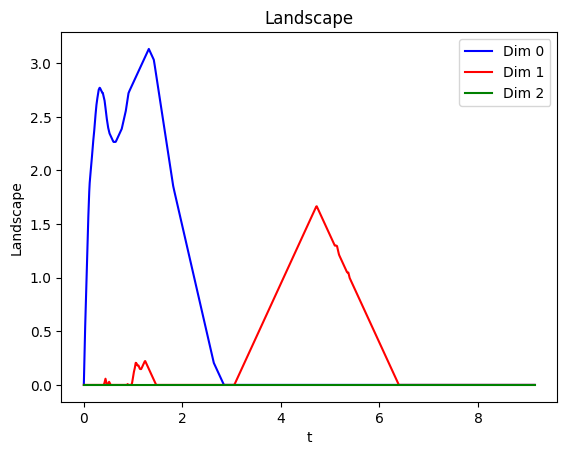

In [4]:
from landscapes import Landscape

intensity = 0.2
max_r = 10
xMax = 10
yMax = 10
n_samples_average = 1000
n_samples = 100

sampled_landscapes = []
xx, yy = poissonPointProcess(intensity, xMax = xMax, yMax=yMax, seed=123)
tree = gudhi.alpha_complex.AlphaComplex(points=np.array([xx, yy]).T).create_simplex_tree(max_alpha_square=max_r)
for vertices, t in tree.get_filtration():
    f.append(dio.Simplex(vertices, t))
f.sort()
test_land = Landscape(f)
test_land.plot()

Filtration with 93 simplices


Computing boundary matrices:   0%|          | 0/93 [00:00<?, ?it/s]

  0%|          | 0/55 [00:00<?, ?it/s]

  0%|          | 0/55 [00:00<?, ?it/s]

/home/siroj/code/Master_thesis/code/Laplacian_Functions_torch.py:782: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


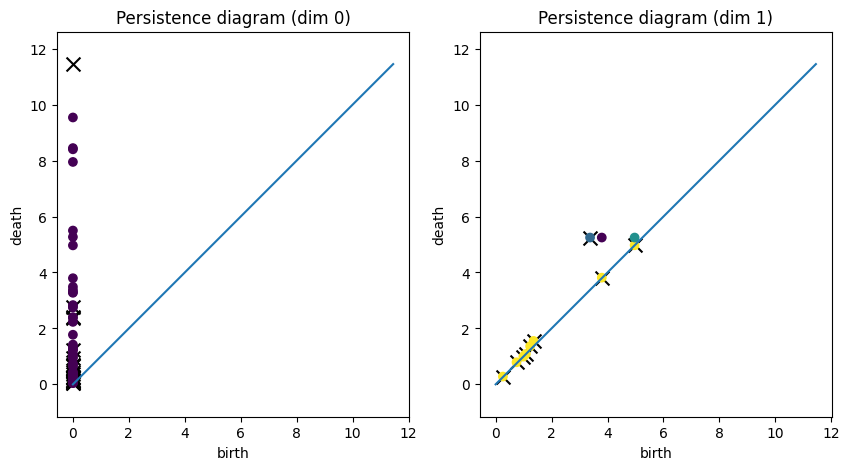

In [5]:
import gudhi.alpha_complex


xx, yy = poissonPointProcess(0.2, xMax=10, yMax = 10, seed=None, plot=False)
max_r = 10
# f = dio.fill_rips(np.array([xx, yy]).T, 1, max_r)
f = dio.Filtration()
tree = gudhi.alpha_complex.AlphaComplex(points=np.array([xx, yy]).T).create_simplex_tree(max_alpha_square=max_r)
for vertices, t in tree.get_filtration():
     f.append(dio.Simplex(vertices, t))
print(f)
# f.sort()
# p = dio.cohomology_persistence(f, 47, True)
# dgms = dio.init_diagrams(p, f)
# # dio.plot.plot_all_diagrams(dgms, limits=[0, max_r, 0, max_r])
# # plt.show()

def Laplacian_fun(B22_st, B22_stm1, B22_sm1t, B22_sm1tm1, eye):
    return B22_sm1t@B22_stm1-B22_st

# eigenvalues, relevant_times, fig, ax = plot_Laplacian_new_eigenvalues(f, lambda x: 1,  max_dim =1, device= "cpu", plot_types=["Min", "Max", "Sum", "Amount of"], Laplacian_fun= Laplacian_fun, method="less_memory", plot_args_diag={"c": "black", "alpha": 1, "marker": "x"}, plot_type_to_fun={"Amount of": len}, integer_time_steps=False)#, device="cpu")
eigenvalues, relevant_times, s_lists, t_lists, cmaps = plot_Laplacian_new_eigenvalues(f, lambda x: 1, plot_diagram=True, max_dim =1, device= "cpu", plot_types=["Min", "Max", "Sum", "Amount of"], Laplacian_fun= Laplacian_fun, method="less_memory", plot_args_diag={"c": "black", "alpha": 1, "marker": "x"}, plot_type_to_fun={"Amount of": len}, integer_time_steps=False)#, device="cpu")

In [21]:
n_samples = 100
n_new_samples = 100
max_dim = 1
seed = 123
max_r = 20
prime = 47
intensity = 0.2

sampled_arrays_normal = [[] for _ in range(max_dim+1)]
sampled_arrays_lap = [[] for _ in range(max_dim+1)]
sampled_arrays_normal_halved = [[] for _ in range(max_dim+1)]
sampled_arrays_lap_halved = [[] for _ in range(max_dim+1)]

skipped_i = 0


for i_sample in tqdm(range(n_samples)):
     while True:
          xx, yy = poissonPointProcess(intensity, xMax=10, yMax = 10, seed=seed+i_sample+skipped_i, plot=False)
          
          # f = dio.fill_rips(np.array([xx, yy]).T, 1, max_r)
          f = dio.Filtration()
          tree = gudhi.alpha_complex.AlphaComplex(points=np.array([xx, yy]).T).create_simplex_tree(max_alpha_square=max_r)
          for vertices, t in tree.get_filtration():
               f.append(dio.Simplex(vertices, t))


          p = dio.cohomology_persistence(f, prime, True)
          dgms = dio.init_diagrams(p, f)
          s_list, t_list = [], []
          for q in range(max_dim+1):
               s_list.append([])
               t_list.append([])
               for point in dgms[q]:
                    if point.death != np.inf:
                         s_list[q].append(point.birth)
                         t_list[q].append(point.death)

          points_in_every_dim = True
          for q in range(max_dim+1):
               if len(s_list[q]) == 0:
                    points_in_every_dim = False
                    break

          if points_in_every_dim:
               break
          else:
               skipped_i += 1
     for q in range(max_dim+1):
          sampled_arrays_normal[q].append(np.array([s_list[q], t_list[q]]).T)

     eigenvalues, relevant_times, s_list, t_list, cmap = plot_Laplacian_new_eigenvalues(f, lambda x: 1, plot_diagram=True, show_plot= False, max_dim = max_dim, device= "cpu", plot_types=["Min", "Max", "Sum", "Amount of"], Laplacian_fun= Laplacian_fun, method="less_memory", plot_args_diag={"c": "black", "alpha": 1, "marker": "x"}, plot_type_to_fun={"Amount of": len}, integer_time_steps=False)#, device="cpu")
     for q in range(max_dim+1):
          sampled_arrays_lap[q].append(np.array([s_list[q], t_list[q], cmap[q]]).T)

print("Sampled arrays normal intensity.")
# for i_sample in tqdm(range(n_samples)):
#      while True:
#           xx, yy = poissonPointProcess(intensity/2, xMax=10, yMax = 10, seed=seed+i_sample, plot=False)
          
#           # f = dio.fill_rips(np.array([xx, yy]).T, 1, max_r)
#           f = dio.Filtration()
#           tree = gudhi.alpha_complex.AlphaComplex(points=np.array([xx, yy]).T).create_simplex_tree(max_alpha_square=max_r)
#           for vertices, t in tree.get_filtration():
#                f.append(dio.Simplex(vertices, t))


#           p = dio.cohomology_persistence(f, prime, True)
#           dgms = dio.init_diagrams(p, f)
#           s_list, t_list = [], []
#           for q in range(max_dim+1):
#                s_list.append([])
#                t_list.append([])
#                for point in dgms[q]:
#                     if point.death != np.inf:
#                          s_list[q].append(point.birth)
#                          t_list[q].append(point.death)

#           points_in_every_dim = True
#           for q in range(max_dim+1):
#                if len(s_list[q]) == 0:
#                     points_in_every_dim = False
#                     break

#           if points_in_every_dim:
#                for q in range(max_dim+1):
#                     sampled_arrays_normal_halved[q].append(np.array([s_list[q], t_list[q]]).T)

#                eigenvalues, relevant_times, s_list, t_list, cmap = plot_Laplacian_new_eigenvalues(f, lambda x: 1, plot_diagram=True, show_plot= False, max_dim = max_dim, device= "cpu", plot_types=["Min", "Max", "Sum", "Amount of"], Laplacian_fun= Laplacian_fun, method="less_memory", plot_args_diag={"c": "black", "alpha": 1, "marker": "x"}, plot_type_to_fun={"Amount of": len}, integer_time_steps=False)#, device="cpu")
#                for q in range(max_dim+1):
#                     sampled_arrays_lap_halved[q].append(np.array([s_list[q], t_list[q], cmap[q]]).T)
#                break
     

  0%|          | 0/100 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/111 [00:00<?, ?it/s]

  0%|          | 0/71 [00:00<?, ?it/s]

  0%|          | 0/71 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/97 [00:00<?, ?it/s]

  0%|          | 0/59 [00:00<?, ?it/s]

  0%|          | 0/59 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/93 [00:00<?, ?it/s]

  0%|          | 0/58 [00:00<?, ?it/s]

  0%|          | 0/58 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/53 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/95 [00:00<?, ?it/s]

  0%|          | 0/54 [00:00<?, ?it/s]

  0%|          | 0/54 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/129 [00:00<?, ?it/s]

  0%|          | 0/78 [00:00<?, ?it/s]

  0%|          | 0/78 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/99 [00:00<?, ?it/s]

  0%|          | 0/58 [00:00<?, ?it/s]

  0%|          | 0/58 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/61 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/85 [00:00<?, ?it/s]

  0%|          | 0/53 [00:00<?, ?it/s]

  0%|          | 0/53 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/121 [00:00<?, ?it/s]

  0%|          | 0/73 [00:00<?, ?it/s]

  0%|          | 0/73 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/87 [00:00<?, ?it/s]

  0%|          | 0/57 [00:00<?, ?it/s]

  0%|          | 0/57 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/117 [00:00<?, ?it/s]

  0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/72 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/99 [00:00<?, ?it/s]

  0%|          | 0/58 [00:00<?, ?it/s]

  0%|          | 0/58 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/37 [00:00<?, ?it/s]

  0%|          | 0/37 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/143 [00:00<?, ?it/s]

  0%|          | 0/94 [00:00<?, ?it/s]

  0%|          | 0/94 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/107 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/95 [00:00<?, ?it/s]

  0%|          | 0/58 [00:00<?, ?it/s]

  0%|          | 0/58 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/109 [00:00<?, ?it/s]

  0%|          | 0/69 [00:00<?, ?it/s]

  0%|          | 0/69 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/143 [00:00<?, ?it/s]

  0%|          | 0/87 [00:00<?, ?it/s]

  0%|          | 0/87 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/85 [00:00<?, ?it/s]

  0%|          | 0/85 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/107 [00:00<?, ?it/s]

  0%|          | 0/67 [00:00<?, ?it/s]

  0%|          | 0/67 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/99 [00:00<?, ?it/s]

  0%|          | 0/59 [00:00<?, ?it/s]

  0%|          | 0/59 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/48 [00:00<?, ?it/s]

  0%|          | 0/48 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/93 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/81 [00:00<?, ?it/s]

  0%|          | 0/53 [00:00<?, ?it/s]

  0%|          | 0/53 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/99 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/87 [00:00<?, ?it/s]

  0%|          | 0/53 [00:00<?, ?it/s]

  0%|          | 0/53 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/135 [00:00<?, ?it/s]

  0%|          | 0/89 [00:00<?, ?it/s]

  0%|          | 0/89 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/115 [00:00<?, ?it/s]

  0%|          | 0/71 [00:00<?, ?it/s]

  0%|          | 0/71 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/77 [00:00<?, ?it/s]

  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/45 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/37 [00:00<?, ?it/s]

  0%|          | 0/37 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/95 [00:00<?, ?it/s]

  0%|          | 0/58 [00:00<?, ?it/s]

  0%|          | 0/58 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/67 [00:00<?, ?it/s]

  0%|          | 0/43 [00:00<?, ?it/s]

  0%|          | 0/43 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/77 [00:00<?, ?it/s]

  0%|          | 0/53 [00:00<?, ?it/s]

  0%|          | 0/53 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/115 [00:00<?, ?it/s]

  0%|          | 0/70 [00:00<?, ?it/s]

  0%|          | 0/70 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/53 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/113 [00:00<?, ?it/s]

  0%|          | 0/71 [00:00<?, ?it/s]

  0%|          | 0/71 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/123 [00:00<?, ?it/s]

  0%|          | 0/81 [00:00<?, ?it/s]

  0%|          | 0/81 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/145 [00:00<?, ?it/s]

  0%|          | 0/93 [00:00<?, ?it/s]

  0%|          | 0/93 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/75 [00:00<?, ?it/s]

  0%|          | 0/47 [00:00<?, ?it/s]

  0%|          | 0/47 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/111 [00:00<?, ?it/s]

  0%|          | 0/70 [00:00<?, ?it/s]

  0%|          | 0/70 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/83 [00:00<?, ?it/s]

  0%|          | 0/53 [00:00<?, ?it/s]

  0%|          | 0/53 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/121 [00:00<?, ?it/s]

  0%|          | 0/76 [00:00<?, ?it/s]

  0%|          | 0/76 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/48 [00:00<?, ?it/s]

  0%|          | 0/48 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/135 [00:00<?, ?it/s]

  0%|          | 0/85 [00:00<?, ?it/s]

  0%|          | 0/85 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/99 [00:00<?, ?it/s]

  0%|          | 0/65 [00:00<?, ?it/s]

  0%|          | 0/65 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/109 [00:00<?, ?it/s]

  0%|          | 0/68 [00:00<?, ?it/s]

  0%|          | 0/68 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/62 [00:00<?, ?it/s]

  0%|          | 0/62 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/35 [00:00<?, ?it/s]

  0%|          | 0/35 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/59 [00:00<?, ?it/s]

  0%|          | 0/37 [00:00<?, ?it/s]

  0%|          | 0/37 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/85 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/105 [00:00<?, ?it/s]

  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/64 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/81 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/91 [00:00<?, ?it/s]

  0%|          | 0/59 [00:00<?, ?it/s]

  0%|          | 0/59 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/91 [00:00<?, ?it/s]

  0%|          | 0/54 [00:00<?, ?it/s]

  0%|          | 0/54 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/149 [00:00<?, ?it/s]

  0%|          | 0/91 [00:00<?, ?it/s]

  0%|          | 0/91 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/64 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/95 [00:00<?, ?it/s]

  0%|          | 0/59 [00:00<?, ?it/s]

  0%|          | 0/59 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/129 [00:00<?, ?it/s]

  0%|          | 0/77 [00:00<?, ?it/s]

  0%|          | 0/77 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/76 [00:00<?, ?it/s]

  0%|          | 0/76 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/51 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/57 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/93 [00:00<?, ?it/s]

  0%|          | 0/57 [00:00<?, ?it/s]

  0%|          | 0/57 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/91 [00:00<?, ?it/s]

  0%|          | 0/57 [00:00<?, ?it/s]

  0%|          | 0/57 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/95 [00:00<?, ?it/s]

  0%|          | 0/59 [00:00<?, ?it/s]

  0%|          | 0/59 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/85 [00:00<?, ?it/s]

  0%|          | 0/54 [00:00<?, ?it/s]

  0%|          | 0/54 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/113 [00:00<?, ?it/s]

  0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/72 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/91 [00:00<?, ?it/s]

  0%|          | 0/58 [00:00<?, ?it/s]

  0%|          | 0/58 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/117 [00:00<?, ?it/s]

  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/74 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/89 [00:00<?, ?it/s]

  0%|          | 0/58 [00:00<?, ?it/s]

  0%|          | 0/58 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/75 [00:00<?, ?it/s]

  0%|          | 0/75 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/109 [00:00<?, ?it/s]

  0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/72 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/113 [00:00<?, ?it/s]

  0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/72 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/77 [00:00<?, ?it/s]

  0%|          | 0/48 [00:00<?, ?it/s]

  0%|          | 0/48 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/87 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/147 [00:00<?, ?it/s]

  0%|          | 0/93 [00:00<?, ?it/s]

  0%|          | 0/93 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/61 [00:00<?, ?it/s]

  0%|          | 0/35 [00:00<?, ?it/s]

  0%|          | 0/35 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/71 [00:00<?, ?it/s]

  0%|          | 0/46 [00:00<?, ?it/s]

  0%|          | 0/46 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/117 [00:00<?, ?it/s]

  0%|          | 0/73 [00:00<?, ?it/s]

  0%|          | 0/73 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/135 [00:00<?, ?it/s]

  0%|          | 0/78 [00:00<?, ?it/s]

  0%|          | 0/78 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/153 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/91 [00:00<?, ?it/s]

  0%|          | 0/58 [00:00<?, ?it/s]

  0%|          | 0/58 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/93 [00:00<?, ?it/s]

  0%|          | 0/62 [00:00<?, ?it/s]

  0%|          | 0/62 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/36 [00:00<?, ?it/s]

  0%|          | 0/36 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/121 [00:00<?, ?it/s]

  0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/72 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/53 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/117 [00:00<?, ?it/s]

  0%|          | 0/78 [00:00<?, ?it/s]

  0%|          | 0/78 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/37 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/143 [00:00<?, ?it/s]

  0%|          | 0/87 [00:00<?, ?it/s]

  0%|          | 0/87 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/39 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/69 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/109 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/75 [00:00<?, ?it/s]

  0%|          | 0/47 [00:00<?, ?it/s]

  0%|          | 0/47 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/85 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/61 [00:00<?, ?it/s]

  0%|          | 0/37 [00:00<?, ?it/s]

  0%|          | 0/37 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/85 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/95 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Sampled arrays normal intensity.


In [22]:
distances_normal = []
distances_lap = []
distances_normal_halved = []
distances_lap_halved = []

for i_sample in tqdm(range(n_new_samples)):
    while True:
        xx, yy = poissonPointProcess(intensity, xMax=10, yMax = 10, seed=seed+n_samples+i_sample+skipped_i, plot=False)
        # f = dio.fill_rips(np.array([xx, yy]).T, 1, max_r)
        f = dio.Filtration()
        tree = gudhi.alpha_complex.AlphaComplex(points=np.array([xx, yy]).T).create_simplex_tree(max_alpha_square=max_r)
        for vertices, t in tree.get_filtration():
            f.append(dio.Simplex(vertices, t))

        p = dio.cohomology_persistence(f, prime, True)
        dgms = dio.init_diagrams(p, f)
        s_list, t_list = [], []
        for q in range(max_dim+1):
            s_list.append([])
            t_list.append([])
            for point in dgms[q]:
                if point.death != np.inf:
                        s_list[q].append(point.birth)
                        t_list[q].append(point.death)

        points_in_every_dim = True
        for q in range(max_dim+1):
            if len(s_list[q]) == 0:
                points_in_every_dim = False
                break

        if points_in_every_dim:
            break
        else:
            skipped_i += 1
    cur_array = {}
    for q in range(max_dim+1):
        cur_array[q] = np.array([s_list[q], t_list[q]]).T
    distance = 0
    for i_other_sample in range(n_samples):
        for q in range(max_dim+1):
            distance += ss.wasserstein_distance_nd(sampled_arrays_normal[q][i_other_sample], cur_array[q])
    distances_normal.append(distance/n_samples) #average over the number of simplices in the other sample

    eigenvalues, relevant_times, s_list, t_list, cmap = plot_Laplacian_new_eigenvalues(f, lambda x: 1, plot_diagram=True, show_plot= False, max_dim = max_dim, device= "cpu", plot_types=["Min", "Max", "Sum", "Amount of"], Laplacian_fun= Laplacian_fun, method="less_memory", plot_args_diag={"c": "black", "alpha": 1, "marker": "x"}, plot_type_to_fun={"Amount of": len}, integer_time_steps=False)#, device="cpu")

    cur_array = {}
    for q in range(max_dim+1):
        cur_array[q] = np.array([s_list[q], t_list[q], cmap[q]]).T
    distance = 0
    for i_other_sample in range(n_samples):
        for q in range(max_dim+1):
            distance += ss.wasserstein_distance_nd(sampled_arrays_lap[q][i_other_sample], cur_array[q])
    distances_lap.append(distance/n_samples) #average over the number of simplices in the other sample

print("Distances normal intensity done!")

for i_sample in tqdm(range(n_new_samples)):
    while True:
        xx, yy = poissonPointProcess(intensity/2, xMax=10, yMax = 10, seed=seed+n_samples+i_sample+skipped_i, plot=False)
        # f = dio.fill_rips(np.array([xx, yy]).T, 1, max_r)
        f = dio.Filtration()
        tree = gudhi.alpha_complex.AlphaComplex(points=np.array([xx, yy]).T).create_simplex_tree(max_alpha_square=max_r)
        for vertices, t in tree.get_filtration():
            f.append(dio.Simplex(vertices, t))

        p = dio.cohomology_persistence(f, prime, True)
        dgms = dio.init_diagrams(p, f)
        s_list, t_list = [], []
        for q in range(max_dim+1):
            s_list.append([])
            t_list.append([])
            for point in dgms[q]:
                if point.death != np.inf:
                        s_list[q].append(point.birth)
                        t_list[q].append(point.death)

        points_in_every_dim = True
        for q in range(max_dim+1):
            if len(s_list[q]) == 0:
                points_in_every_dim = False
                break

        if points_in_every_dim:
            break
        else:
            skipped_i += 1
    cur_array = {}
    for q in range(max_dim+1):
        cur_array[q] = np.array([s_list[q], t_list[q]]).T
    distance = 0
    for i_other_sample in range(n_samples):
        for q in range(max_dim+1):
            distance += ss.wasserstein_distance_nd(sampled_arrays_normal[q][i_other_sample], cur_array[q])
    distances_normal_halved.append(distance/n_samples) #average over the number of simplices in the other sample

    eigenvalues, relevant_times, s_list, t_list, cmap = plot_Laplacian_new_eigenvalues(f, lambda x: 1, plot_diagram=True, show_plot= False, max_dim = max_dim, device= "cpu", plot_types=["Min", "Max", "Sum", "Amount of"], Laplacian_fun= Laplacian_fun, method="less_memory", plot_args_diag={"c": "black", "alpha": 1, "marker": "x"}, plot_type_to_fun={"Amount of": len}, integer_time_steps=False)#, device="cpu")
    cur_array = {}
    for q in range(max_dim+1):
        cur_array[q] = np.array([s_list[q], t_list[q], cmap[q]]).T
    distance = 0
    for i_other_sample in range(n_samples):        
        for q in range(max_dim+1):
            try:
                distance += ss.wasserstein_distance_nd(sampled_arrays_lap[q][i_other_sample], cur_array[q])
            except:
                print("sampled array:", sampled_arrays_lap[q][i_other_sample])
                print("cur array:", cur_array[q])

                raise Exception("Error in distance calculation")
    distances_lap_halved.append(distance/n_samples) #average over the number of simplices in the other sample
print("Distances halved intensity done!")

  0%|          | 0/100 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/123 [00:00<?, ?it/s]

  0%|          | 0/77 [00:00<?, ?it/s]

  0%|          | 0/77 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/95 [00:00<?, ?it/s]

  0%|          | 0/58 [00:00<?, ?it/s]

  0%|          | 0/58 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/42 [00:00<?, ?it/s]

  0%|          | 0/42 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/127 [00:00<?, ?it/s]

  0%|          | 0/82 [00:00<?, ?it/s]

  0%|          | 0/82 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/61 [00:00<?, ?it/s]

  0%|          | 0/35 [00:00<?, ?it/s]

  0%|          | 0/35 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/91 [00:00<?, ?it/s]

  0%|          | 0/58 [00:00<?, ?it/s]

  0%|          | 0/58 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/57 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/77 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/111 [00:00<?, ?it/s]

  0%|          | 0/67 [00:00<?, ?it/s]

  0%|          | 0/67 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/85 [00:00<?, ?it/s]

  0%|          | 0/48 [00:00<?, ?it/s]

  0%|          | 0/48 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/97 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/69 [00:00<?, ?it/s]

  0%|          | 0/42 [00:00<?, ?it/s]

  0%|          | 0/42 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/141 [00:00<?, ?it/s]

  0%|          | 0/86 [00:00<?, ?it/s]

  0%|          | 0/86 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/103 [00:00<?, ?it/s]

  0%|          | 0/65 [00:00<?, ?it/s]

  0%|          | 0/65 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/39 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/73 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/75 [00:00<?, ?it/s]

  0%|          | 0/47 [00:00<?, ?it/s]

  0%|          | 0/47 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/97 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/105 [00:00<?, ?it/s]

  0%|          | 0/61 [00:00<?, ?it/s]

  0%|          | 0/61 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/65 [00:00<?, ?it/s]

  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/45 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/75 [00:00<?, ?it/s]

  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/45 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/135 [00:00<?, ?it/s]

  0%|          | 0/85 [00:00<?, ?it/s]

  0%|          | 0/85 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/93 [00:00<?, ?it/s]

  0%|          | 0/54 [00:00<?, ?it/s]

  0%|          | 0/54 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/83 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/111 [00:00<?, ?it/s]

  0%|          | 0/69 [00:00<?, ?it/s]

  0%|          | 0/69 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/97 [00:00<?, ?it/s]

  0%|          | 0/54 [00:00<?, ?it/s]

  0%|          | 0/54 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/73 [00:00<?, ?it/s]

  0%|          | 0/48 [00:00<?, ?it/s]

  0%|          | 0/48 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/105 [00:00<?, ?it/s]

  0%|          | 0/65 [00:00<?, ?it/s]

  0%|          | 0/65 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/73 [00:00<?, ?it/s]

  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/45 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/54 [00:00<?, ?it/s]

  0%|          | 0/54 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/93 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/89 [00:00<?, ?it/s]

  0%|          | 0/59 [00:00<?, ?it/s]

  0%|          | 0/59 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/89 [00:00<?, ?it/s]

  0%|          | 0/89 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/87 [00:00<?, ?it/s]

  0%|          | 0/54 [00:00<?, ?it/s]

  0%|          | 0/54 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/109 [00:00<?, ?it/s]

  0%|          | 0/62 [00:00<?, ?it/s]

  0%|          | 0/62 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/51 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/117 [00:00<?, ?it/s]

  0%|          | 0/73 [00:00<?, ?it/s]

  0%|          | 0/73 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/83 [00:00<?, ?it/s]

  0%|          | 0/53 [00:00<?, ?it/s]

  0%|          | 0/53 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/99 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/117 [00:00<?, ?it/s]

  0%|          | 0/76 [00:00<?, ?it/s]

  0%|          | 0/76 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/95 [00:00<?, ?it/s]

  0%|          | 0/55 [00:00<?, ?it/s]

  0%|          | 0/55 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/65 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/73 [00:00<?, ?it/s]

  0%|          | 0/46 [00:00<?, ?it/s]

  0%|          | 0/46 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/61 [00:00<?, ?it/s]

  0%|          | 0/35 [00:00<?, ?it/s]

  0%|          | 0/35 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/105 [00:00<?, ?it/s]

  0%|          | 0/65 [00:00<?, ?it/s]

  0%|          | 0/65 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/147 [00:00<?, ?it/s]

  0%|          | 0/94 [00:00<?, ?it/s]

  0%|          | 0/94 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/47 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/75 [00:00<?, ?it/s]

  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/45 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/87 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/73 [00:00<?, ?it/s]

  0%|          | 0/43 [00:00<?, ?it/s]

  0%|          | 0/43 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/91 [00:00<?, ?it/s]

  0%|          | 0/59 [00:00<?, ?it/s]

  0%|          | 0/59 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/95 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/95 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/87 [00:00<?, ?it/s]

  0%|          | 0/55 [00:00<?, ?it/s]

  0%|          | 0/55 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/81 [00:00<?, ?it/s]

  0%|          | 0/46 [00:00<?, ?it/s]

  0%|          | 0/46 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/99 [00:00<?, ?it/s]

  0%|          | 0/58 [00:00<?, ?it/s]

  0%|          | 0/58 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/73 [00:00<?, ?it/s]

  0%|          | 0/43 [00:00<?, ?it/s]

  0%|          | 0/43 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/61 [00:00<?, ?it/s]

  0%|          | 0/37 [00:00<?, ?it/s]

  0%|          | 0/37 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/59 [00:00<?, ?it/s]

  0%|          | 0/39 [00:00<?, ?it/s]

  0%|          | 0/39 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/61 [00:00<?, ?it/s]

  0%|          | 0/61 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/107 [00:00<?, ?it/s]

  0%|          | 0/65 [00:00<?, ?it/s]

  0%|          | 0/65 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/55 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/69 [00:00<?, ?it/s]

  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/45 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/121 [00:00<?, ?it/s]

  0%|          | 0/73 [00:00<?, ?it/s]

  0%|          | 0/73 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/103 [00:00<?, ?it/s]

  0%|          | 0/61 [00:00<?, ?it/s]

  0%|          | 0/61 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/103 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/151 [00:00<?, ?it/s]

  0%|          | 0/95 [00:00<?, ?it/s]

  0%|          | 0/95 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/113 [00:00<?, ?it/s]

  0%|          | 0/70 [00:00<?, ?it/s]

  0%|          | 0/70 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/75 [00:00<?, ?it/s]

  0%|          | 0/46 [00:00<?, ?it/s]

  0%|          | 0/46 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/91 [00:00<?, ?it/s]

  0%|          | 0/58 [00:00<?, ?it/s]

  0%|          | 0/58 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/83 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/105 [00:00<?, ?it/s]

  0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/72 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/109 [00:00<?, ?it/s]

  0%|          | 0/67 [00:00<?, ?it/s]

  0%|          | 0/67 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/91 [00:00<?, ?it/s]

  0%|          | 0/58 [00:00<?, ?it/s]

  0%|          | 0/58 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/67 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/83 [00:00<?, ?it/s]

  0%|          | 0/55 [00:00<?, ?it/s]

  0%|          | 0/55 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/75 [00:00<?, ?it/s]

  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/45 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/115 [00:00<?, ?it/s]

  0%|          | 0/71 [00:00<?, ?it/s]

  0%|          | 0/71 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/117 [00:00<?, ?it/s]

  0%|          | 0/73 [00:00<?, ?it/s]

  0%|          | 0/73 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/76 [00:00<?, ?it/s]

  0%|          | 0/76 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/87 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/73 [00:00<?, ?it/s]

  0%|          | 0/42 [00:00<?, ?it/s]

  0%|          | 0/42 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/67 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/135 [00:00<?, ?it/s]

  0%|          | 0/85 [00:00<?, ?it/s]

  0%|          | 0/85 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/103 [00:00<?, ?it/s]

  0%|          | 0/59 [00:00<?, ?it/s]

  0%|          | 0/59 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/115 [00:00<?, ?it/s]

  0%|          | 0/70 [00:00<?, ?it/s]

  0%|          | 0/70 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/81 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/97 [00:00<?, ?it/s]

  0%|          | 0/59 [00:00<?, ?it/s]

  0%|          | 0/59 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/61 [00:00<?, ?it/s]

  0%|          | 0/37 [00:00<?, ?it/s]

  0%|          | 0/37 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/109 [00:00<?, ?it/s]

  0%|          | 0/62 [00:00<?, ?it/s]

  0%|          | 0/62 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/127 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/85 [00:00<?, ?it/s]

  0%|          | 0/53 [00:00<?, ?it/s]

  0%|          | 0/53 [00:00<?, ?it/s]

Distances normal intensity done!


  0%|          | 0/100 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/36 [00:00<?, ?it/s]

  0%|          | 0/36 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/39 [00:00<?, ?it/s]

  0%|          | 0/22 [00:00<?, ?it/s]

  0%|          | 0/22 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/67 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/51 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/73 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/43 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/51 [00:00<?, ?it/s]

  0%|          | 0/34 [00:00<?, ?it/s]

  0%|          | 0/34 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/37 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/43 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/43 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/39 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/39 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/43 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/53 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/53 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/55 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/39 [00:00<?, ?it/s]

  0%|          | 0/22 [00:00<?, ?it/s]

  0%|          | 0/22 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/43 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/69 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/43 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/39 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/39 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/35 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/39 [00:00<?, ?it/s]

  0%|          | 0/39 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/39 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/51 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/55 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/75 [00:00<?, ?it/s]

  0%|          | 0/44 [00:00<?, ?it/s]

  0%|          | 0/44 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/53 [00:00<?, ?it/s]

  0%|          | 0/34 [00:00<?, ?it/s]

  0%|          | 0/34 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/35 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/47 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/35 [00:00<?, ?it/s]

  0%|          | 0/22 [00:00<?, ?it/s]

  0%|          | 0/22 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/39 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/53 [00:00<?, ?it/s]

  0%|          | 0/34 [00:00<?, ?it/s]

  0%|          | 0/34 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/55 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/35 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/65 [00:00<?, ?it/s]

  0%|          | 0/42 [00:00<?, ?it/s]

  0%|          | 0/42 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/43 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/51 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/43 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/61 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/35 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/91 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/35 [00:00<?, ?it/s]

  0%|          | 0/22 [00:00<?, ?it/s]

  0%|          | 0/22 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/39 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

Distances halved intensity done!


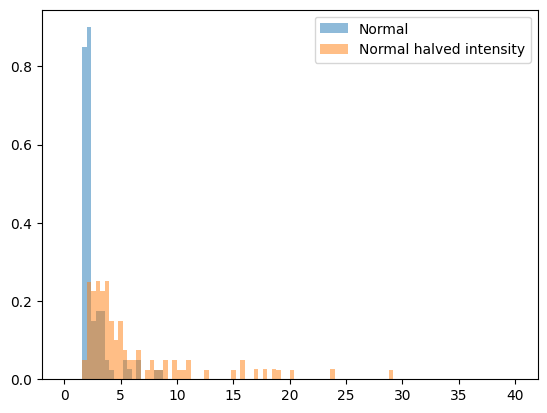

In [28]:
plt.hist(distances_normal, bins=100, alpha=0.5, label="Normal", density=True, range=(0,40))

plt.hist(distances_normal_halved, bins=100, alpha=0.5, label="Normal halved intensity", density=True, range=(0,40))

plt.legend()

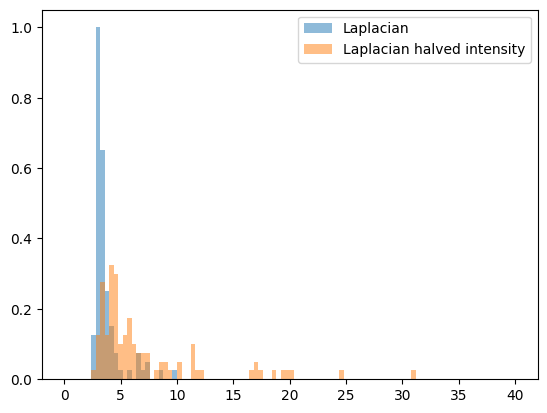

In [27]:
plt.hist(distances_lap, bins=100, alpha=0.5, label="Laplacian", density=True, range=(0,40))
plt.hist(distances_lap_halved, bins=100, alpha=0.5, label="Laplacian halved intensity", density=True, range=(0,40))
plt.legend()


In [23]:
n_samples = 100
n_new_samples = 100
max_dim = 1
seed = 123
prime = 47

sampled_arrays_normal = [[] for _ in range(max_dim+1)]

for i_sample in tqdm(range(n_samples)):
     while True:
          xx, yy = poissonPointProcess(0.2, xMax=10, yMax = 10, seed=seed+i_sample, plot=False)
          max_r = 10
          # f = dio.fill_rips(np.array([xx, yy]).T, 1, max_r)
          f = dio.Filtration()
          tree = gudhi.alpha_complex.AlphaComplex(points=np.array([xx, yy]).T).create_simplex_tree(max_alpha_square=max_r)
          for vertices, t in tree.get_filtration():
               f.append(dio.Simplex(vertices, t))

          p = dio.cohomology_persistence(f, prime, True)
          dgms = dio.init_diagrams(p, f)
          s_list, t_list = [], []
          for q in range(max_dim+1):
               s_list.append([])
               t_list.append([])
               for point in dgms[q]:
                    if point.death != np.inf:
                         s_list[q].append(point.birth)
                         t_list[q].append(point.death)


          points_in_every_dim = True
          for q in range(max_dim+1):
               if len(s_list[q]) == 0:
                    points_in_every_dim = False
                    break

          if points_in_every_dim:
               for q in range(max_dim+1):
                    sampled_arrays_normal[q].append(np.array([s_list[q], t_list[q]]).T)
               break

distances_normal = []

for i_sample in tqdm(range(n_new_samples)):
     xx, yy = poissonPointProcess(0.2, xMax=10, yMax = 10, seed=seed+n_samples+i_sample, plot=False)
     max_r = 10
     # f = dio.fill_rips(np.array([xx, yy]).T, 1, max_r)
     f = dio.Filtration()
     tree = gudhi.alpha_complex.AlphaComplex(points=np.array([xx, yy]).T).create_simplex_tree(max_alpha_square=max_r)
     for vertices, t in tree.get_filtration():
          f.append(dio.Simplex(vertices, t))

     p = dio.cohomology_persistence(f, prime, True)
     dgms = dio.init_diagrams(p, f)
     s_list, t_list = [], []
     for q in range(max_dim+1):
          s_list.append([])
          t_list.append([])
          for point in dgms[q]:
               if point.death != np.inf:
                    s_list[q].append(point.birth)
                    t_list[q].append(point.death)

     cur_array = {}
     for q in range(max_dim+1):
          cur_array[q] = np.array([s_list[q], t_list[q]]).T
     distance = 0
     for i_other_sample in range(len(sampled_arrays_normal[0])):
          for q in range(max_dim+1):
               distance += ss.wasserstein_distance_nd(sampled_arrays_normal[q][i_other_sample], cur_array[q])
          
     distances_normal.append(distance/len(sampled_arrays_normal[0])) #average over the number of simplices in the other sample
distances_normal

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

[1.5938465916117628,
 1.8643693143414166,
 2.8315790416200737,
 1.776147549258148,
 3.189767623487058,
 1.6427391072951656,
 2.1631881120390886,
 2.1526902161944306,
 3.047175314120312,
 1.7196734927680308,
 1.7593741161537364,
 2.086169424788471,
 1.8982919964398073,
 2.990665394714325,
 1.7251437376648555,
 4.314589804802669,
 1.71155531130135,
 1.7712458970861613,
 1.6910846192236617,
 2.101318184333085,
 2.0311697798412256,
 2.3970585529407256,
 2.0035624933398792,
 1.7446931347860408,
 1.9752292017740334,
 1.768619052681551,
 1.685097954121454,
 1.8509020175760036,
 1.6605607505167175,
 1.984365097673869,
 1.6289509776787958,
 1.594736323320505,
 1.6385834912018413,
 3.5134425168916827,
 2.0386767161984904,
 2.1075025305016366,
 2.005084856610216,
 5.585382813746227,
 1.8857340085993715,
 3.138036776773295,
 2.201997835474449,
 1.8357703028911636,
 1.8759434610631076,
 1.7741921518715338,
 3.527781057271491,
 3.141860620384555,
 1.9184674099131271,
 2.003943770513595,
 1.651292403

(array([ 6.,  8.,  7., 10.,  3., 10.,  8.,  3.,  5.,  2.,  5.,  2.,  3.,
         1.,  0.,  2.,  1.,  0.,  0.,  2.,  1.,  2.,  0.,  0.,  4.,  0.,
         0.,  1.,  1.,  0.,  3.,  2.,  1.,  0.,  0.,  0.,  1.,  2.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([1.58345816, 1.63493839, 1.68641861, 1.73789883, 1.78937906,
        1.84085928, 1.8923395 , 1.94381972, 1.99529995, 2.04678017,
        2.09826039, 2.14974062, 2.20122084, 2.25270106, 2.30418128,
        2.35566151, 2.40714173, 2.45862195, 2.51010218, 2.5615824 ,
        2.61306262, 2.66454284, 2.71602307, 2.76750329, 2.81898351,
        2.87046374, 2.92194396, 2.97342418, 3.0249044 , 3.07638463,
        3.12786485, 3.1793

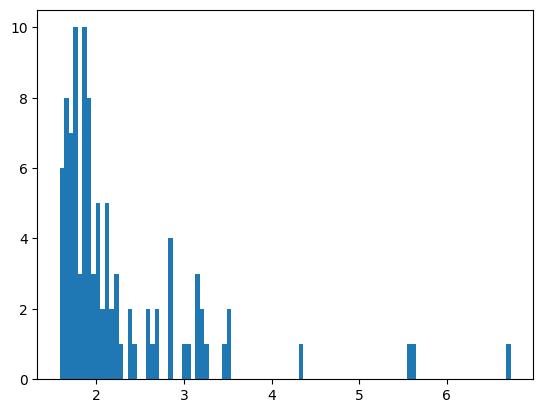

In [25]:
plt.hist(distances_normal, bins=100)

In [18]:
for i_sample in tqdm(range(n_new_samples)):
     xx, yy = poissonPointProcess(0.2, xMax=10, yMax = 10, seed=None, plot=False)
     max_r = 10
     # f = dio.fill_rips(np.array([xx, yy]).T, 1, max_r)
     f = dio.Filtration()
     tree = gudhi.alpha_complex.AlphaComplex(points=np.array([xx, yy]).T).create_simplex_tree(max_alpha_square=max_r)
     for vertices, t in tree.get_filtration():
          f.append(dio.Simplex(vertices, t))

     eigenvalues, relevant_times, s_list, t_list, cmap = plot_Laplacian_new_eigenvalues(f, lambda x: 1, plot_diagram=True, show_plot= False, max_dim = max_dim, device= "cpu", plot_types=["Min", "Max", "Sum", "Amount of"], Laplacian_fun= Laplacian_fun, method="less_memory", plot_args_diag={"c": "black", "alpha": 1, "marker": "x"}, plot_type_to_fun={"Amount of": len}, integer_time_steps=False)#, device="cpu")

     cur_array = {}
     for q in range(max_dim+1):
          cur_array[q] = np.array([s_list[q], t_list[q], cmap[q]]).T
     for i_other_sample in range(len(sampled_arrays[0])):
          distance = 0
          print(i_other_sample)
          for q in range(max_dim+1):
               distance += ss.wasserstein_distance_nd(sampled_arrays[q][i_other_sample], cur_array[q])
     distances.append(np.mean(distance))

  0%|          | 0/100 [00:00<?, ?it/s]

Computing boundary matrices:   0%|          | 0/85 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27


ValueError: Distribution can't be empty.

In [5]:
def Laplacian_fun(B22_st, B22_stm1, B22_sm1t, B22_sm1tm1, eye):
    res = B22_sm1t@B22_stm1-B22_st
    print("frac zero:", (res < 1e-13).sum()/(res.shape[0]*res.shape[1]))
    return res

calc_cross(f, 1, 0.01, 0.04, verb=True, Laplacian_fun=Laplacian_fun)

Computing boundary matrices:   0%|          | 0/947 [00:00<?, ?it/s]

Computing boundary matrices done.
Bqplus1:
tensor([[-1.,  0.,  0.,  ...,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  ...,  1.,  1.,  1.]], device='cuda:0')
n_q_t:[106, 36, 2, 0], n_q_s: [106, 2, 0, 0]
B12_st:
tensor([[-1.,  0.],
        [ 0.,  0.]], device='cuda:0')
B22_st:
tensor([[ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  1.],
        [ 0.,  0.],
        [ 1.,  0.],
        [ 0.,  0.],
        [ 0., -1.],
        [ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.],
        [ 1.,  0.],
        [ 0.,  1.],
        [ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.],
        [ 0

tensor([[-2.2204e-16,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00]], device='cuda:0')

In [ ]:
torch.tensor([[1e-15,2,3],[3,4,5]]).count_nonzero()